In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import files
uploaded = files.upload()

Saving ad_conversion.csv to ad_conversion.csv
Saving churn.csv to churn.csv
Saving fish.csv to fish.csv
Saving sp500_yearly_returns.csv to sp500_yearly_returns.csv
Saving taiwan_real_estate2.csv to taiwan_real_estate2.csv


In [3]:
churn = pd.read_csv('churn.csv')
churn

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640
...,...,...,...
395,1,1.077655,0.878567
396,1,-1.273770,-0.869016
397,1,-0.426195,0.684666
398,1,0.818836,1.428091


## Exploring the explanatory variables

In a sns.displot() call on the churn data, plot time_since_last_purchase as two histograms, split for each has_churned value.

**HINT!**

sns.displot() takes three arguments: data, x, and col.




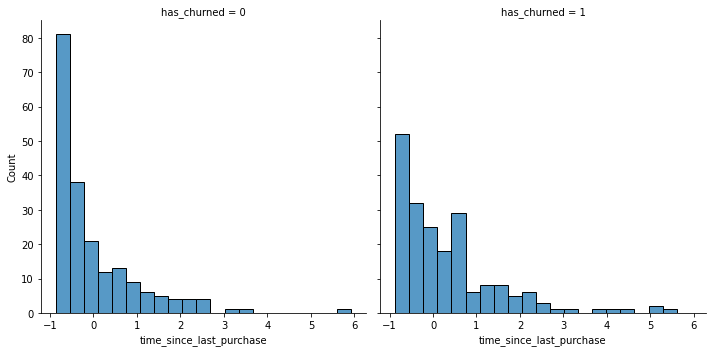

In [4]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(x = 'time_since_last_purchase', col = 'has_churned', data = churn)

# Show the plot
plt.show()

Redraw the histograms using the time_since_first_purchase column, split for each has_churned value.




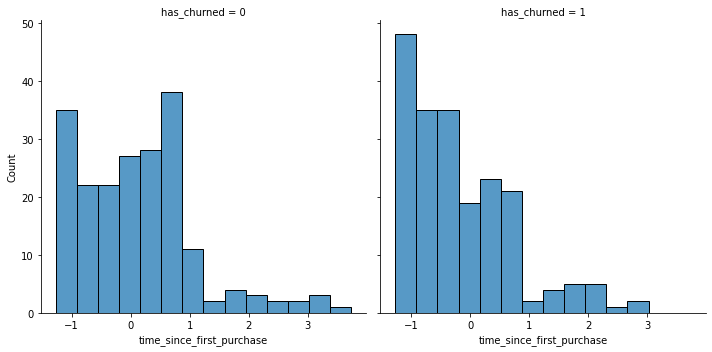

In [5]:
# Redraw the plot with time_since_first_purchase
sns.displot(x = 'time_since_first_purchase', col = 'has_churned', data = churn)

# Show the plot
plt.show()

## Visualizing linear and logistic models

Using churn, plot has_churned versus time_since_first_purchase as a scatter plot with a red linear regression trend line (without a standard error ribbon).

**HINT!**

The sns.regplot() function takes five arguments in this exercise: x, y, data, ci, and line_kws. The last one is already filled in, and makes the trend line stand out more.



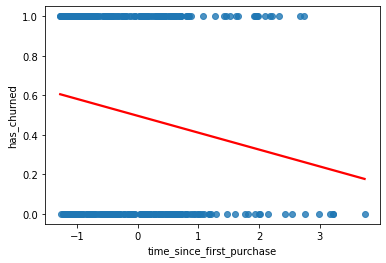

In [6]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x = 'time_since_first_purchase', y ='has_churned', data = churn, ci = None,
            line_kws={"color": "red"})

# Show the plot
plt.show()

Using churn, plot has_churned versus time_since_first_purchase as a scatter plot with a blue logistic regression trend line (without a standard error ribbon).


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


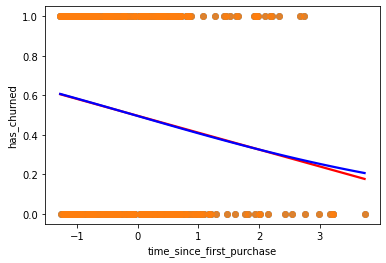

In [7]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            logistic = True,
            line_kws={"color": "blue"})

# Show the plot
plt.show()

## Logistic regression with logit()

1. Import the logit() function from statsmodels.formula.api.
2. Fit a logistic regression of has_churned versus time_since_first_purchase using the churn dataset. Assign to mdl_churn_vs_relationship.
3. Print the parameters of the fitted model.

**HINT!**

Call logit(), passing a formula of has_churned versus time_since_first_purchase and setting data to churn.


In [8]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. 
# length of relationship using the churn dataset
mdl_churn_vs_relationship = logit("has_churned ~ time_since_first_purchase", data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


1. Create a scatter plot with a logistic trend line of has_churned versus time_since_first_purchase.
2. Overlay the plot with the points from prediction_data, colored red.

In [11]:
# Use this explanatory data
explanatory_data = pd.DataFrame({"time_since_first_purchase": np.arange(-1.5, 4.1, 0.25)})
explanatory_data

,time_since_first_purchase
0,-1.50
1,-1.25
2,-1.00
3,-0.75
4,-0.50
5,-0.25
6,0.00
7,0.25
8,0.50
9,0.75


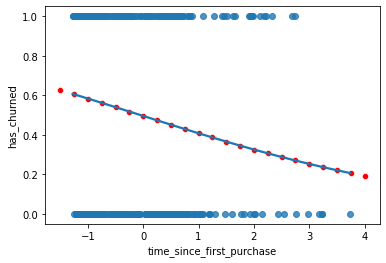

In [12]:
# Create prediction_data
prediction_data = explanatory_data.assign(
    has_churned = mdl_churn_vs_relationship.predict(explanatory_data)
)

fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase",
                y="has_churned",
                data=prediction_data,
                color="red")

plt.show()

## Most likely outcome

When explaining your results to a non-technical audience, you may wish to side-step talking about probabilities and simply explain the most likely outcome. That is, rather than saying there is a 60% chance of a customer churning, you say that the most likely outcome is that the customer will churn. The trade-off here is easier interpretation at the cost of nuance.

1. Update prediction_data to add a column of the most likely churn outcome, most_likely_outcome.
2. Print the first five lines of prediction_data.

In [13]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data['has_churned'])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome
0                      -1.50     0.626448                  1.0
1                      -1.25     0.605470                  1.0
2                      -1.00     0.584096                  1.0
3                      -0.75     0.562401                  1.0
4                      -0.50     0.540465                  1.0


1. The code for creating a scatter plot with logistic trend line has been added from a previous exercise.
2. Overlay the plot with prediction_data with red data points, with most_likely_outcome on the y-axis.

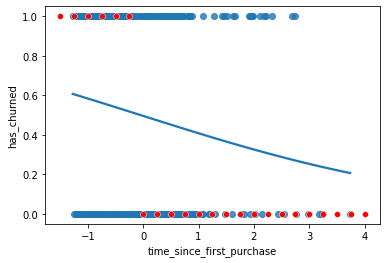

In [14]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# Create a new figure
fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x = 'time_since_first_purchase',
y = 'most_likely_outcome', color = 'red', data = prediction_data)

# Show the plot
plt.show()

## Odds ratio

Odds ratios compare the probability of something happening with the probability of it not happening. This is sometimes easier to reason about than probabilities, particularly when you want to make decisions about choices. For example, if a customer has a 20% chance of churning, it may be more intuitive to say "the chance of them not churning is four times higher than the chance of them churning".

1. Update prediction_data to add a column, odds_ratio, of the odds ratios.
2. Print the first five lines of prediction_data.


In [15]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data['has_churned'] / (1-prediction_data['has_churned'])

# Print the head
print(prediction_data.head())

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio
0                      -1.50     0.626448                  1.0    1.677003
1                      -1.25     0.605470                  1.0    1.534661
2                      -1.00     0.584096                  1.0    1.404400
3                      -0.75     0.562401                  1.0    1.285197
4                      -0.50     0.540465                  1.0    1.176111


1. Using prediction_data, draw a line plot of odds_ratio versus time_since_first_purchase.
2. Some code for preparing the final plot has already been added.

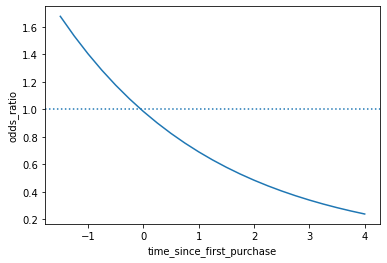

In [16]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

# Create a new figure
fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x = 'time_since_first_purchase', y = 'odds_ratio', data = prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

# Show the plot
plt.show()

## Calculating the confusion matrix

A confusion matrix (occasionally called a confusion table) is the basis of all performance metrics for models with a categorical response (such as a logistic regression). It contains the counts of each actual response-predicted response pair. In this case, where there are two possible responses (churn or not churn), there are four overall outcomes.

* True positive: The customer churned and the model predicted they would.
* False positive: The customer didn't churn, but the model predicted they would.
* True negative: The customer didn't churn and the model predicted they wouldn't.
* False negative: The customer churned, but the model predicted they wouldn't.

Exercise :

1. Get the actual responses by subsetting the has_churned column of the dataset. Assign to actual_response.
2. Get the "most likely" predicted responses from the model. Assign to predicted_response.
3. Create a DataFrame from actual_response and predicted_response. Assign to outcomes.
4. Print outcomes as a table of counts, representing the confusion matrix. This has been done for you.


In [17]:
# Get the actual responses
actual_response = churn['has_churned']

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({'actual_response' : actual_response,
                         'predicted_response' : predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
dtype: int64


## Drawing a mosaic plot of the confusion matrix

1. Import the mosaic() function from statsmodels.graphics.mosaicplot.
2. Create conf_matrix using the .pred_table() method and print it.
3. Draw a mosaic plot of the confusion matrix.

**HINT!**

To calculate the confusion matrix, you can call .pred_table() on the fitted model, mdl_churn_vs_relationship.



[[112.  88.]
 [ 76. 124.]]


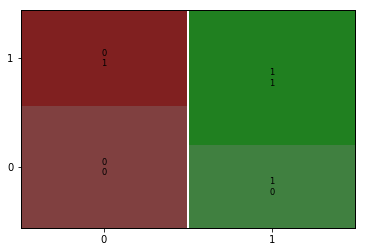

In [18]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)
plt.show()

## Measuring logistic model performance
1. Extract the number of true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) from conf_matrix.
2. Calculate the accuracy of the model.
3. Calculate the sensitivity of the model.
4. Calculate the specificity of the model.

In [19]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = (TN + TP) / (TN + TP + FN + FP)
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = TP / (FN + TP)
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = TN / (TN + FP)
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56
